In [4]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import random
x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)



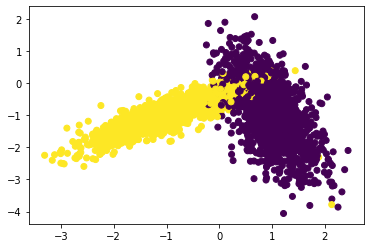

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()


In [6]:
from sklearn.metrics import accuracy_score
def randomsearchcv(x_train,y_train,classifier, params, folds):
    train_score=[]
    test_score=[]
    for i in (params['n_neighbours']):
        train_fold=[] #except fold_test value
        test_fold=[] #storing single fold_test value 
        for j in range(folds):
            a=len(x_train)/folds #len(single_fold)
            a=int(a)
            test_indices=list(set(list(range((a*j),a*(j+1))))) #getting test_index
            train_indices=list(set(list(range(0, len(x_train)))) - set(test_indices))#train_index
            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]
            X_test  = x_train[test_indices]
            Y_test  = y_train[test_indices]
            classifier.n_neighbors = i #i=no. of neighbours
            classifier.fit(X_train,Y_train)
            Y_predicted = classifier.predict(X_test)
            test_fold.append(accuracy_score(Y_test, Y_predicted))#accuracy score
            Y_predicted = classifier.predict(X_train) 
            train_fold.append(accuracy_score(Y_train, Y_predicted))
        train_score.append(np.mean(np.array(train_fold)))#mean of train_score
        test_score.append(np.mean(np.array(test_fold)))#mean of cv_scores
    return train_score,test_score            

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")
neigh = KNeighborsClassifier()
param_list=random.sample(range(10,70),10)#uniform random distri of 10 values
param_list.sort()
params={'n_neighbours':param_list}#no. of neighbours
print("n_neighbours :",param_list)
folds=4 
train_scores,cv_scores= randomsearchcv(X_train, y_train, neigh, params, folds)
print("cv_Scores :",cv_scores)
print("Train_Scores :",train_scores)

n_neighbours : [19, 20, 21, 30, 36, 48, 54, 60, 67, 68]
cv_Scores : [0.9553333333333334, 0.9550666666666667, 0.9553333333333334, 0.9563999999999999, 0.956, 0.9572, 0.9573333333333334, 0.9566666666666667, 0.9573333333333334, 0.9568]
Train_Scores : [0.9575555555555556, 0.9576444444444444, 0.9574222222222222, 0.9571555555555555, 0.9568888888888889, 0.9573777777777779, 0.9576444444444444, 0.9574666666666667, 0.9569333333333334, 0.9570666666666666]


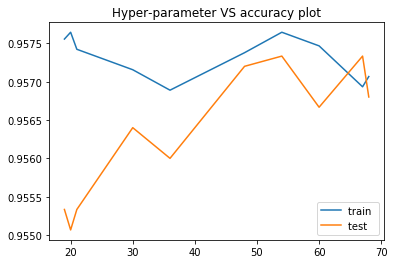

In [19]:
plt.plot(params['n_neighbours'],train_scores, label='train ')
plt.plot(params['n_neighbours'],cv_scores, label='test ')
plt.title('Hyper-parameter VS accuracy plot') 
plt.legend()
plt.show()
#best_hyperparam=65

In [22]:
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

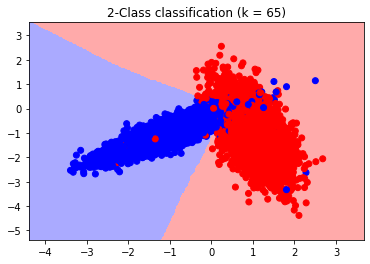

In [23]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 65)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)